In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
url = 'C:/Users/aswan/Data analysis/Fintech project/Credit card fraud datasets/train.csv'

In [3]:
df = pd.read_csv(url, index_col='TRANSACTION_ID')

In [4]:
df.sample(5)

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
TRANSACTION_ID,,,,,
267546,2021-11-17 17:24:55,207,1208,126.21,0
75009,2021-08-09 08:22:06,194,937,133.72,0
200049,2021-10-13 12:05:56,842,795,4.92,0
237951,2021-11-02 10:10:16,944,1407,99.10,0
317402,2021-12-13 15:11:42,836,749,160.98,0


In [5]:
df.shape

(291231, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291231 entries, 59383 to 350613
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   TX_DATETIME  291231 non-null  object 
 1   CUSTOMER_ID  291231 non-null  int64  
 2   TERMINAL_ID  291231 non-null  int64  
 3   TX_AMOUNT    291231 non-null  float64
 4   TX_FRAUD     291231 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 13.3+ MB


In [7]:
df.describe()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
count,291231.000000,291231.000000,291231.000000,291231.000000
mean,496.256202,993.718526,53.182274,0.022601
std,285.274966,575.267551,39.573329,0.148627
min,0.000000,0.000000,0.000000,0.000000
25%,249.000000,496.000000,21.130000,0.000000
50%,498.000000,1000.000000,44.770000,0.000000
75%,741.000000,1483.000000,76.850000,0.000000
max,999.000000,1999.000000,291.150000,1.000000


In [8]:
df.isnull().sum()

TX_DATETIME    0
CUSTOMER_ID    0
TERMINAL_ID    0
TX_AMOUNT      0
TX_FRAUD       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.corr()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
CUSTOMER_ID,1.000000,0.000823,0.004186,0.001702
TERMINAL_ID,0.000823,1.000000,-0.003315,0.010631
TX_AMOUNT,0.004186,-0.003315,1.000000,0.015275
TX_FRAUD,0.001702,0.010631,0.015275,1.000000


### Initial Insight

- There are 291231 rows and 5 columns. That means Total number of transactions is 291231 held.
- The columns are 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_FRAUD'.
- The dataset contains 3 int64, 1 float64 and 1 object datatype.
- There is no missing values and duplicate values.
- There are outliers in the TX_AMOUNT.
- The dataset is imbalanced.

### Univariate Analysis

<AxesSubplot: xlabel='TX_FRAUD', ylabel='count'>

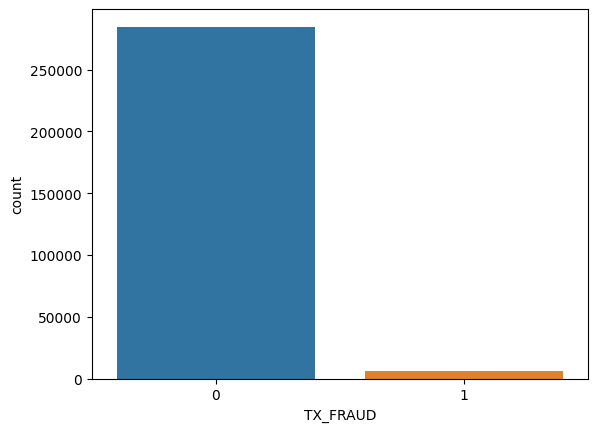

In [11]:
# Distribution of TX_AMOUNT
sns.countplot(x=df.TX_FRAUD)

In [12]:
df.TX_FRAUD.value_counts()

0    284649
1      6582
Name: TX_FRAUD, dtype: int64

#### Insight
- 284649 transactions are legitimate 
- 6582 transactions are fraud 
- The class is imbalanced

<AxesSubplot: ylabel='Density'>

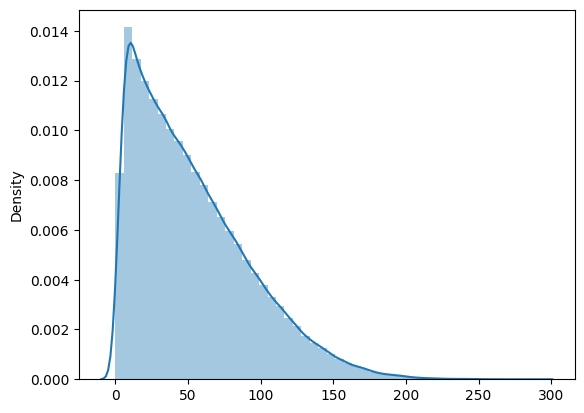

In [13]:
# Distribution of TX_AMOUNT

sns.distplot(x=df.TX_AMOUNT, kde=True)

<AxesSubplot: xlabel='TX_AMOUNT'>

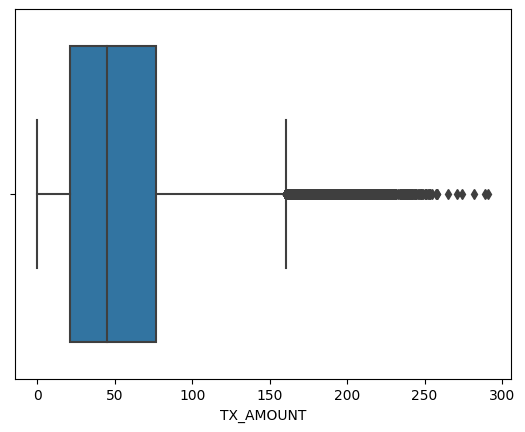

In [14]:
sns.boxplot(x=df.TX_AMOUNT)

In [15]:
df[df.TX_AMOUNT == 0.0].TX_FRAUD.value_counts()

0    9
Name: TX_FRAUD, dtype: int64

#### Insight

- The distribution of 'TX_AMOUNT' is right skewed. Better apply log transformation.
- There are outliers present in the higher transaction amount. But need to check whether those outliers are fraudulent or not.
- In 9 transactions the transaction amount is 0 and they are valid transactions. Let's considered that as null values.

In [17]:
# converting 'TX_DATETIME' dtype from object

df.TX_DATETIME = pd.to_datetime(df.TX_DATETIME)

In [19]:
df['hour'] = df['TX_DATETIME'].dt.hour
df['day'] = df['TX_DATETIME'].dt.day
df['month'] = df['TX_DATETIME'].dt.month
df['year'] = df['TX_DATETIME'].dt.year

In [20]:
df.head()

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,hour,day,month,year
TRANSACTION_ID,,,,,,,,,
59383,2021-08-01 00:04:37,323,217,4.60,0,0,1,8,2021
59384,2021-08-01 00:12:10,6,429,8.61,0,0,1,8,2021
59385,2021-08-01 00:12:34,714,1011,64.00,0,0,1,8,2021
59386,2021-08-01 00:15:40,266,1969,12.72,0,0,1,8,2021
59387,2021-08-01 00:16:01,890,1482,98.88,0,0,1,8,2021


In [21]:
df.year.value_counts()

2021    291231
Name: year, dtype: int64

In [22]:
df.month.value_counts()

8     59193
10    59166
11    57800
9     57582
12    57490
Name: month, dtype: int64

In [24]:
df.hour.value_counts()

11    21454
12    21188
10    21007
13    20833
14    19530
9     19416
8     17701
15    17449
7     15690
16    15316
17    13350
6     13303
18    10854
5     10808
19     8822
4      8721
20     6808
3      6733
21     5071
2      4939
22     3657
1      3575
23     2540
0      2466
Name: hour, dtype: int64

<AxesSubplot: xlabel='month', ylabel='Count'>

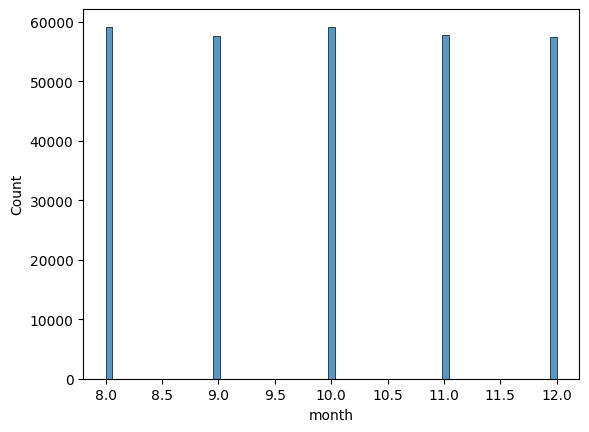

In [25]:
sns.histplot(x=df.month)